<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


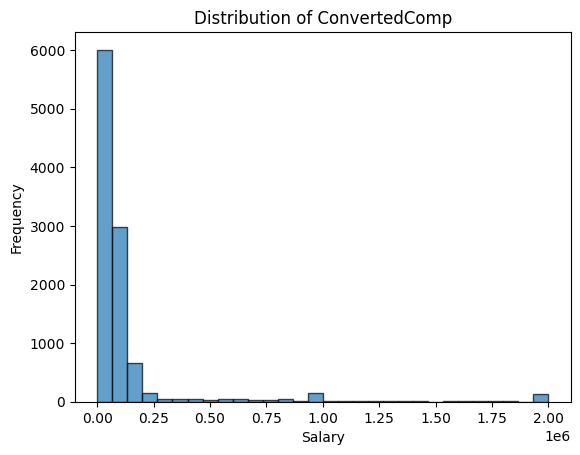

In [11]:
# your code goes here
import matplotlib.pyplot as plt

plt.hist(df["ConvertedComp"], bins=30, edgecolor='k', alpha=0.7)

plt.title("Distribution of ConvertedComp")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

Plot the histogram for the column `ConvertedComp`.


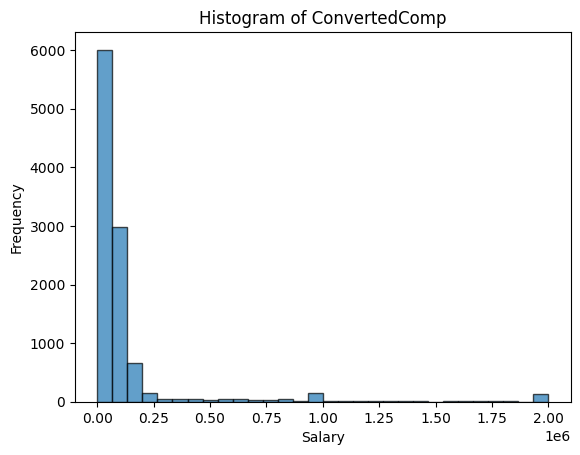

In [12]:
# your code goes here
import matplotlib.pyplot as plt

plt.hist(df["ConvertedComp"], bins=30, edgecolor='k', alpha=0.7)

plt.title("Histogram of ConvertedComp")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
median = df["ConvertedComp"].median()
print("Median:",median)

Median: 57745.0


How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
man_responders = df["Gender"].value_counts().get("Man", 0)
print("Number of responders that identify only as a Man:", man_responders)

Number of responders that identify only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
# your code goes here
woman_df = df[df["Gender"] == "Woman"]
median_woman = woman_df["ConvertedComp"].median()
print("Median ConvertedComp of responders identified themselves only as a Woman:",median_woman)

Median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
# your code goes here
min_val = df["Age"].min()
q1 = df["Age"].quantile(0.25)
median_val = df["Age"].median()
q3 = df["Age"].quantile(0.75)
max_val = df["Age"].max()

print("Five-number summary for Age:")
print(f"Minimum: {min_val}")
print(f"25% (Q1): {q1}")
print(f"50% (Median): {median_val}")
print(f"75% (Q3): {q3}")
print(f"Maximum: {max_val}")


Five-number summary for Age:
Minimum: 16.0
25% (Q1): 25.0
50% (Median): 29.0
75% (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


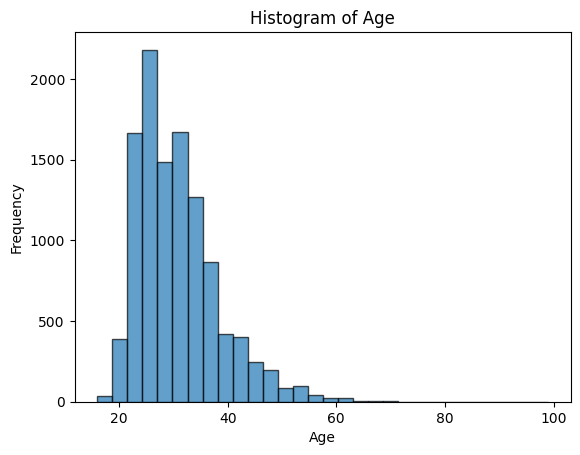

In [22]:
# your code goes here
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins=30, edgecolor='k', alpha=0.7)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


[61000. 95179. 90000. ... 38760.  7724. 19880.]
0.0 2000000.0


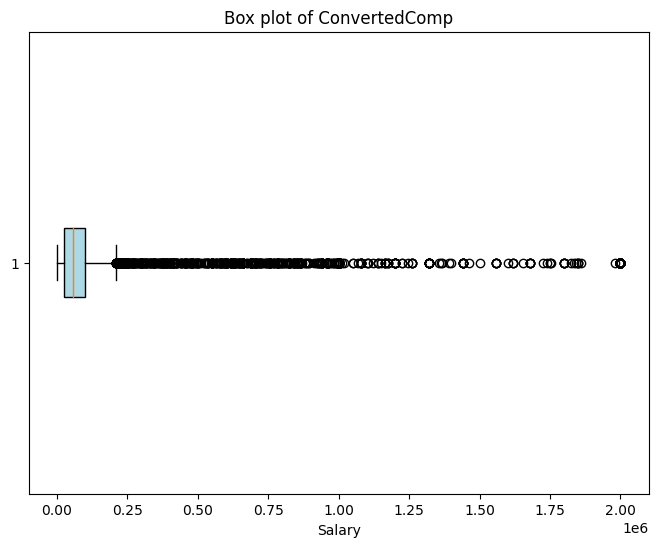

In [24]:
# your code goes here
df["ConvertedComp"] = df["ConvertedComp"].dropna()
print(df["ConvertedComp"].unique())
print(df["ConvertedComp"].min(), df["ConvertedComp"].max())
df["ConvertedComp"] = pd.to_numeric(df["ConvertedComp"], errors='coerce')

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df["ConvertedComp"].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Box plot of ConvertedComp")
plt.xlabel("Salary")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1

print("Interquartile Range (IQR) for ConvertedComp:", iqr)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [29]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = df[(df["ConvertedComp"] < lower_bound) | (df["ConvertedComp"] > upper_bound)]

print("Number of outliers in the ConvertedComp column:", len(outliers))

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

clean_df = df[(df["ConvertedComp"] >= lower_bound) & (df["ConvertedComp"] <= upper_bound)]

print("New DataFrame with outliers removed:")
print(clean_df)

New DataFrame with outliers removed:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlations = numerical_df.corr()

print("Correlation between Age and other numerical columns:")
print(correlations["Age"].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(ticks=np.arange(len(correlations.columns)), labels=correlations.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlations.index)), labels=correlations.index)

plt.title("Correlation Heatmap")
plt.show()

Correlation between Age and other numerical columns:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
